# Python Time Series Crash Course_Part 6: ARIMA & Box-Jenkins

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Autoregressive Integrated Moving Average Model

It is a
generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.
This acronym is descriptive, capturing the key aspects of the model itself. Brie
y, they are:
- AR: $$Autoregression$$. A model that uses the dependent relationship between an observation
and some number of lagged observations.
- I: $$Integrated$$. The use of dierencing of raw observations (i.e. subtracting an observation
from an observation at the previous time step) in order to make the time series stationary.
- MA: $$Moving Average$$. A model that uses the dependency between an observation and
residual errors from a moving average model applied to lagged observations.

## Parameters
Each of these components are explicitly specied in the model as a parameter. A standard
notation is used of ARIMA(p,d,q)

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are dierenced, also called the degree
of differencing.
- q: The size of the moving average window, also called the order of moving average.

# Box-Jenkins Method
The Autoregressive Integrated Moving Average Model, or ARIMA for short is a standard
statistical model for time series forecast and analysis. Along with its development, the authors
Box and Jenkins also suggest a process for identifying, estimating, and checking models for a
specific time series dataset. This process is now referred to as the $$Box-Jenkins Method$$


The approach starts with the
assumption that the process that generated the time series can be approximated 

- using an ARMA
model if it is stationary 
- an ARIMA model if it is non-stationary. 


In 2016 the process becomes a stochastic model building and that it
is an iterative approach that consists of the following 3 steps:
1. Identification. Use the data and all related information to help select a sub-class of
model that may best summarize the data.
2. Estimation. Use the data to train the parameters of the model (i.e. the coecients).
3. Diagnostic Checking. Evaluate the tted model in the context of the available data
and check for areas where the model may be improved

## Identification
The identification step is further broken down into: 

- Assess whether the time series is stationary,
- if not, how many difierences are required to make it stationary. 
- Identify the parameters of an ARMA model for the data.

### Differencing
Below are some tips during identifcation.
- Unit Root Tests. Use unit root statistical tests on the time series to determine whether
or not it is stationary. Repeat after each round of diff
erencing.
- Avoid over differencing. Differencing the time series more than is required can result
in the addition of extra serial correlation and additional complexity.

## Configuring AR and MA
Two diagnostic plots can be used to help choose the p and q parameters of the ARMA or
ARIMA. They are:

- **Autocorrelation Function (ACF)**. The plot summarizes the correlation of an obser-
vation with lag values. The x-axis shows the lag and the y-axis shows the correlation
coecient between -1 and 1 for negative and positive correlation.
- **Partial Autocorrelation Function (PACF)**. The plot summarizes the correlations for
an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conffidence intervals as
horizontal lines. Bars that cross these condence intervals are therefore more significant and
worth noting. Some useful patterns you may observe on these plots are:

1. The model is AR if the ACF trails off after a lag and has a hard cut-off in the PACF after
a lag. This lag is taken as the value for p.
2. The model is MA if the PACF trails off after a lag and has a hard cut-off in the ACF after
the lag. This lag value is taken as the value for q.
3. The model is a mix of AR and MA if both the ACF and PACF trail off

## Estimation
Estimation involves using numerical methods to minimize a loss or error term. We will not
go into the details of estimating model parameters as these details are handled by the chosen
library or tool. 

- "Time Series Analysis: Forecasting and Control" textbook for deeper understanding of the
optimization problem to be solved by ARMA and ARIMA models and 

- optimization methods
like Limited-memory BFGS used to solve it.

## Diagnostic Checking
The idea of diagnostic checking is to look for evidence that the model is not a good t for the
data. Two useful areas to investigate diagnostics are:
1. Overfitting.
2. Residual Errors.

### Overfitting
- Generally, this means that the
model is more complex than it needs to be and captures random noise in the training data. 
- Careful attention
must be paid to both in-sample and out-of-sample performance 

### Residual Errors
- Forecast residuals provide a great opportunity for diagnostics. 
- A review of the distribution of
errors can help tease out bias in the model. The errors from an ideal model would resemble
white noise, that is 

#### A Gaussian distribution with a mean of zero and a symmetrical variance.
- For this, you may use density plots, histograms, and Q-Q plots that compare the distribution of
errors to the expected distribution. 
- A non-Gaussian distribution may suggest an opportunity
for data pre-processing. 
- A skew in the distribution or a non-zero mean may suggest a bias in
forecasts that may be correct.
- Additionally, an ideal model would leave no temporal structure in the time series of forecast
residuals. 
- These can be checked by creating ACF and PACF plots of the residual error time
series. 
- The presence of serial correlation in the residual errors suggests further opportunity for
using this information in the model.

# Start with AR
Autoregression is a time series model that uses observations from previous time steps as input
to a regression equation to predict the value at the next time step. It is a very simple idea
that can result in accurate forecasts on a range of time series problems.

A regression model, such as linear regression, models an output value based on a linear
combination of input values. For example:
$$yhat = b0 + (b1 * X1)$$

- Where yhat is the prediction,
- b0 and b1 are coefficients found by optimizing the model on
training data, and 
- X is an input value. 
- This technique can be used on time series where input
variables are taken as observations at previous time steps, called $$lag-variables$$


- For example, we
can predict the value for the next time step (t+1) given the observations at the current (t and
previous t-1). 

- As a regression model, this would look as follows:

$$X(t + 1) = b0 + (b1 * X(t)) + (b2 * X(t - 1))$$

- Because the regression model uses data from the same input variable at previous time steps,
it is referred to as an a**utoregression (regression of self)**

/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.


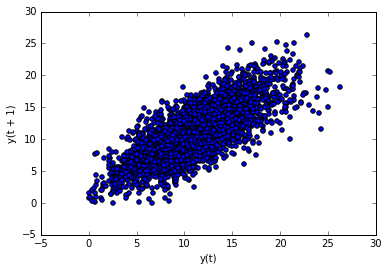

In [1]:
# The code was removed by DSX for sharing.

There is a quick, visual check that we can do to see if there is an autocorrelation in our time
series dataset. We can plot the observation at the current time step (t) with the observation at
the previous time step (t-1) as a scatter plot.

- Pandas provides a built-in plot to do exactly this, called the $$lag plot()$$ 
- We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

In [2]:
# correlation of lag=1
from pandas import Series
from pandas import DataFrame
from pandas import concat
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


- Another quick check that we can do is to directly calculate the correlation
between the observation and the lag variable.
- We can use a statistical test like the Pearson correlation coecient. This produces a number
to summarize how correlated two variables are between -1 (negatively correlated) and +1
(positively correlated) with small values close to zero indicating low correlation and high values
above 0.5 or below -0.5 showing high correlation.
- Correlation can be calculated easily using the corr() function

## ACF Plot
We can plot the correlation coecient for each lag variable. This can very quickly give an
idea of which lag variables may be good candidates

/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


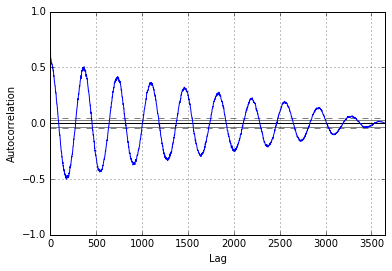

In [3]:
# autocorrelation plot of time series
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

In [4]:
series.head()

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: Temp, dtype: float64

#### The Statsmodels library also provides a version of the plot in the plot $$acf()$$ function as a line plot.

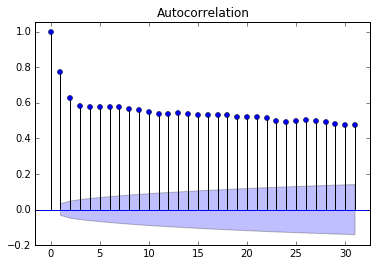

In [6]:
# autocorrelation plot of time series
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
pyplot.show()
#we limit the lag variables evaluated to 31 for readability.

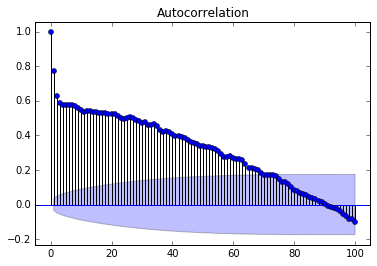

In [8]:
plot_acf(series, lags=100)
pyplot.show()

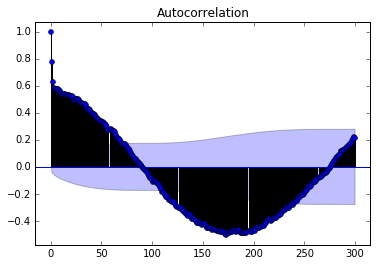

In [9]:
plot_acf(series, lags=300)
pyplot.show()

# Baseline Model
- We can develop a test harness for the problem by splitting the observations into training
and test sets, 
- with only the last 7 observations in the dataset assigned to the test set as unseen
data that we wish to predict. 
- The predictions are made using a walk-forward validation model
so that we can persist the most recent observations for the next day. 
- This means that we are
not making a 7-day forecast, but 7 1-day forecasts.

Test RMSE: 1.850


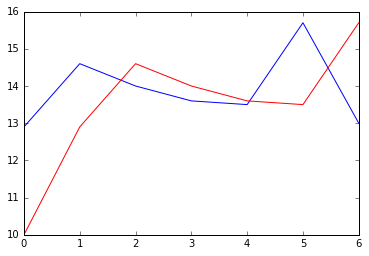

In [10]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
The value provides a
baseline performance for the problem, in this case 1.850 degrees.
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

#### The value provides a baseline performance for the problem, in this case 1.850 degrees.
#### Line plot of the persistence forecast (red) on the Minimum Daily Temperatures dataset (blue).

# AutoRegression
- We can use this model by first creating the model $$AR()$$ and then calling $$fit()$$ to train it
on our dataset. 
- This returns an ARResult object. 
- Once fit, we can use the model to make a
prediction by calling the $$predict()$$ function for a number of observations in the future. 
- This
creates 1 7-day forecast, which is dierent from the persistence example above.

In [12]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Lag: 29
Coefficients: [  5.57543506e-01   5.88595221e-01  -9.08257090e-02   4.82615092e-02
   4.00650265e-02   3.93020055e-02   2.59463738e-02   4.46675960e-02
   1.27681498e-02   3.74362239e-02  -8.11700276e-04   4.79081949e-03
   1.84731397e-02   2.68908418e-02   5.75906178e-04   2.48096415e-02
   7.40316579e-03   9.91622149e-03   3.41599123e-02  -9.11961877e-03
   2.42127561e-02   1.87870751e-02   1.21841870e-02  -1.85534575e-02
  -1.77162867e-03   1.67319894e-02   1.97615668e-02   9.83245087e-03
   6.22710723e-03  -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


- We can see that a 29-lag model was chosen and trained. 
- This is
interesting given how close this lag is to the average number of days in a month. 
- The 7 day
forecast is then printed and the root mean squared error of the forecast is summarized.

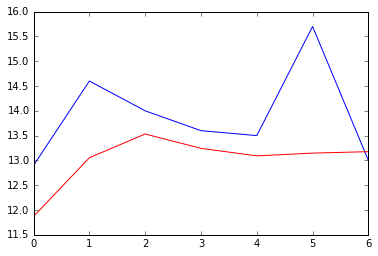

In [13]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

- Line plot of the AR model forecast (red) on the Minimum Daily Temperatures
dataset (blue).
- A plot of the expected vs the predicted values is made. 
- The forecast does look pretty good
(about 1 degree Celsius out each day), with big deviation on day 5.

## How to Deploy
- One way would be to re-train the AR model each day as new observations become
available, and that may be a valid approach, if not computationally expensive. 
- An alternative
would be to use the learned coecients and manually make predictions. This requires that the
history of 29 prior observations be kept and that the coecients be retrieved from the model
and used in the regression equation to come up with new forecasts.

- The coecients are provided in an array with the intercept term followed by the coecients
for each lag variable starting at t to t-n. We simply need to use them in the right order on the
history of observations, as follows:


$$yhat = b0 + (b1 * X1) + (b2 * X2) : : : (bn * Xn)$$

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Test RMSE: 1.204


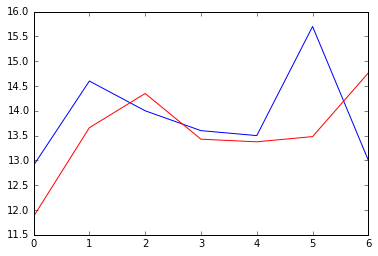

In [15]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### We can see a small improvement in the forecast when comparing the RMSE scores from 1.225 to 1.204.

# Moving Average 
- The residual errors from forecasts on a time series provide another source of information that
we can model. 
- Residual errors themselves form a time series that can have temporal structure.
- A simple autoregression model of this structure can be used to predict the forecast error, 
- which
in turn can be used to correct forecasts. 
- This type of model is called a moving average model, 
#### the same name but very different from moving average smoothing.




- These lag
errors are combined in a linear regression model, much like an autoregression model of the direct
time series observations. 
- An autoregression of the residual error time series is called a Moving
Average (MA) model. 
- This is confusing because it has nothing to do with the moving average
smoothing process. 
- Think of it as the sibling to the autoregressive (AR) process, except on
lagged residual error rather than lagged raw observations.

# Baseline Residual Error Model

In [16]:
# Use Daily Total Female Births
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-total-female-births.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# calculate residual errors for a persistence forecast model
from pandas import Series
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = Series.from_csv(body, header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())


Test RMSE: 9.151
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


#### The example then prints the RMSE of the persistence forecasts and the first 5 rows of the forecast residual errors.

## Autoregression of Residual Error
- We can model the residual error time series using an autoregression model. 
- This is a linear
regression model that creates a weighted linear sum of lagged residual error terms. For example:

$$error(t + 1) = b0 + (b1 * error(t)) + (b2 * error(t - 1)) : : : + (bn * error(t - n))$$



- We can use the autoregression model (AR) provided by the Statsmodels library. 
- Building on
the persistence model in the previous section, we can first train the model on the residual errors
calculated on the training dataset. 
- This requires that we make persistence predictions for each
observation in the training dataset, then create the AR model

In [17]:
from statsmodels.tsa.ar_model import AR
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=15, Coef=[ 0.10120699 -0.84940615 -0.77783609 -0.73345006 -0.68902061 -0.59270551
 -0.5376728  -0.42553356 -0.24861246 -0.19972102 -0.15954013 -0.11045476
 -0.14045572 -0.13299964 -0.12515801 -0.03615774]


- The autoregression model requires the residual error of the 15 previous time steps. 
- Therefore,
we must keep these values handy. As we step through the test dataset timestep by timestep
making predictions and estimating error, 
- we can then calculate the actual residual error and
update the residual error time series lag values (history) 
- so that we can calculate the error at
the next time step.

In [18]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=1.155523, expected error=9.000000
predicted error=-7.108809, expected error=-10.000000
predicted error=3.007486, expected error=3.000000
predicted error=-0.756446, expected error=-6.000000
predicted error=5.511163, expected error=30.000000
predicted error=-19.991264, expected error=-28.000000
predicted error=4.842429, expected error=2.000000
predicted error=3.050883, expected error=9.000000
predicted error=-5.141585, expected error=-7.000000
predicted error=1.161119, expected error=1.000000
predicted error=-0.241928, expected error=-9.000000
predicted error=9.159826, expected error=21.000000
predicted error=-7.117974, expected error=-13.000000
predicted error=1.182992, expected error=-2.000000
predicted error=2.769363, expected error=11.000000
predicted error=-4.959337, expected error=-11.000000
predicted error=2.566233, expected error=-8.000000
predicted error=9.084498, expected error=6.000000
predicted error=3.020899, expected error=16.000000
predicted error=-6.542098

- This is a $$walk-forward-forecast$$

- or a rolling forecast, model. We end up with a time series
of the residual forecast error from the train dataset and a predicted residual error on the test
dataset. 
- We can plot these and get a quick idea of how skillful the model is at predicting residual
error. The complete example is listed below.

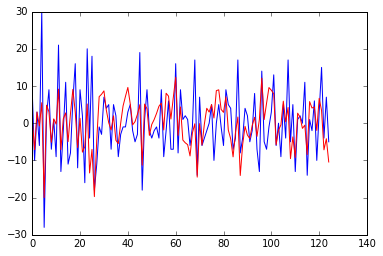

In [19]:
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

- Now that we know how to model residual error, 
- next we will look at how we can go about
correcting forecasts and improving model skill.

# Correct Predictions with a Model of Residuals
- A model of forecast residual error is interesting, but it can also be useful to make better
predictions. 
- With a good estimate of forecast error at a time step, we can make better
predictions. For example

$$improved forecast = forecast + estimated error$$

In [21]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=43.155523, expected=51.000000
predicted=43.891191, expected=41.000000
predicted=44.007486, expected=44.000000
predicted=43.243554, expected=38.000000
predicted=43.511163, expected=68.000000
predicted=48.008736, expected=40.000000
predicted=44.842429, expected=42.000000
predicted=45.050883, expected=51.000000
predicted=45.858415, expected=44.000000
predicted=45.161119, expected=45.000000
predicted=44.758072, expected=36.000000
predicted=45.159826, expected=57.000000
predicted=49.882026, expected=44.000000
predicted=45.182992, expected=42.000000
predicted=44.769363, expected=53.000000
predicted=48.040663, expected=42.000000
predicted=44.566233, expected=34.000000
predicted=43.084498, expected=40.000000
predicted=43.020899, expected=56.000000
predicted=49.457902, expected=44.000000
predicted=45.328116, expected=53.000000
predicted=45.225588, expected=55.000000
predicted=48.705924, expected=39.000000
predicted=44.166344, expected=59.000000
predicted=45.621871, expected=55.000000


- Running the example prints the predictions and the expected outcome for each time step in
the test dataset. 
- The RMSE of the corrected forecasts is calculated to be 7.499 births per day,
- which is much better than the score of 9.151 for the persistence model alone.

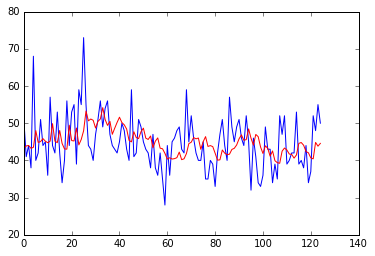

In [22]:
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

- Finally, the expected values for the test dataset are plotted compared to the corrected
forecast. 
- We can see that the persistence model has been aggressively corrected back to a time
series that looks something like a moving average.

# Finally, ARIMA for Forecasting!


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


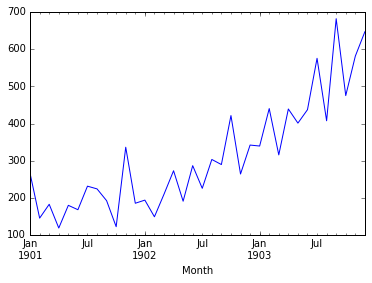

In [23]:
# use shampoo dataset
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='shampoo-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(body, header=0, parse_dates=[0], index_col=0,
    squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

- Shampoo Sales dataset has a clear trend. 
- This suggests that the time
series is not stationary and 
- will require differencing to make it stationary, 
- at least a difference order of 1. 
- Let's also take a quick look at an autocorrelation plot of the time series.

/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  from ipykernel import kernelapp as app


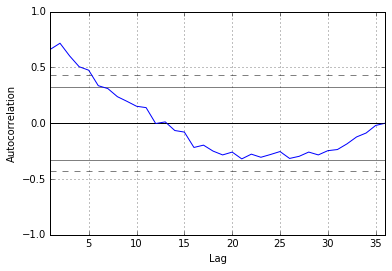

In [24]:
# autocorrelation plot
autocorrelation_plot(series)
pyplot.show()

- there is a positive correlation with the first 10-to-12
lags 
- that is perhaps significant for the first 5 lags. 
- A good starting point for the AR parameter
of the model may be 5.

- We will fit an ARIMA model to the entire Shampoo
Sales dataset and review the residual errors. 
- First, we fit an ARIMA(5,1,0) model. 
- This sets the
lag value to 5 for autoregression, 
- uses a difference order of 1 to make the time series stationary,
and 
- uses a moving average model of 0.

In [26]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 02 Jan 2018   AIC                            406.340
Time:                        22:33:50   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

#### we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

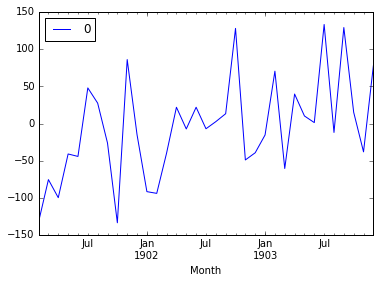

In [27]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()


#### Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

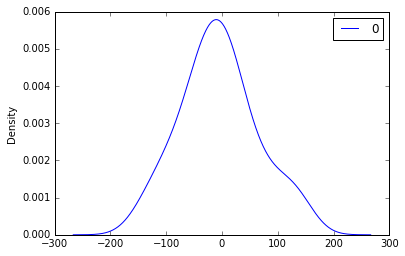

In [29]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()


#### The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [30]:
# summary stats of residuals
print(residuals.describe())

                0
count   35.000000
mean    -5.495314
std     68.132875
min   -133.296699
25%    -42.477969
50%     -7.186746
75%     24.748228
max    133.237885


## Rolling Forecast ARIMA
- The ARIMA model can be used to forecast future time steps. 
- We can use the predict()
function on the ARIMAResults object
- If we used 100 observations in the training dataset to t the model, then the index of the next
time step for making a prediction would be specied to the prediction function as start=101,
end=101.

- forecasted values to be in the original scale, in case we performed any dierencing
(d > 0 when conguring the model). This can be specied by setting the typ argument to the
value 'levels': typ='levels'.

- Alternately, we can avoid all of these specications by using the forecast() function5 which
performs a one-step forecast using the model.

- A rolling forecast is required given the dependence on observations in prior time steps for
dierencing and the AR model.

In [31]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=349.117718, expected=342.300000
predicted=306.512988, expected=339.700000
predicted=387.376451, expected=440.400000
predicted=348.154272, expected=315.900000
predicted=386.308755, expected=439.300000
predicted=356.082067, expected=401.300000
predicted=446.379447, expected=437.400000
predicted=394.737360, expected=575.500000
predicted=434.915543, expected=407.600000
predicted=507.923470, expected=682.000000
predicted=435.482930, expected=475.300000
predicted=652.743730, expected=581.300000
predicted=546.343483, expected=646.900000
Test RMSE: 83.417


#### Running the example prints the prediction and expected value each iteration. 
#### We can also calculate a nal root mean squared error score (RMSE) for the predictions, providing a point of comparison for other ARIMA congurations.

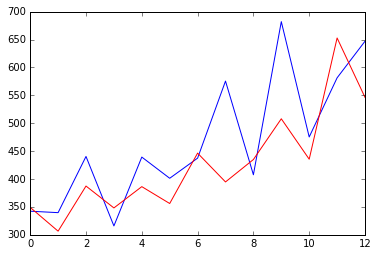

In [32]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


#### The model could use further tuning of the p, d, and maybe even the q parameters.

##  Grid Search with ARIMA Model Hyperparameters

- The ARIMA model for time series analysis and forecasting can be tricky to configure. 
- There are
3 parameters that require estimation by iterative trial and error from reviewing diagnostic plots
and 
- using 40-year-old heuristic rules. 
- We can automate the process of evaluating a large number
of hyperparameters for the ARIMA model by using a $$grid-search$$

- we can specify a site of p, d, and q values to search and pass them to the
evaluate models() function. 
- We will try a suite of lag values (p) and just a few difference
iterations (d) and residual error lag values (q)

In [38]:
# grid search ARIMA parameters for time series
import warnings 

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [39]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    

In [40]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=228.966
ARIMA(0, 0, 1) RMSE=195.308
ARIMA(0, 0, 2) RMSE=154.886
ARIMA(0, 1, 0) RMSE=134.176
ARIMA(0, 1, 1) RMSE=97.767
ARIMA(0, 2, 0) RMSE=259.499
ARIMA(0, 2, 1) RMSE=135.361
ARIMA(1, 0, 0) RMSE=152.030
ARIMA(1, 1, 0) RMSE=84.388
ARIMA(1, 1, 1) RMSE=83.688
ARIMA(1, 2, 0) RMSE=136.411
ARIMA(2, 1, 0) RMSE=75.432
ARIMA(2, 1, 1) RMSE=88.089
ARIMA(2, 2, 0) RMSE=99.302
ARIMA(4, 1, 0) RMSE=81.545
ARIMA(4, 1, 1) RMSE=82.440
ARIMA(4, 2, 0) RMSE=87.157
ARIMA(4, 2, 1) RMSE=68.519
ARIMA(6, 1, 0) RMSE=82.523
ARIMA(6, 2, 0) RMSE=79.127
ARIMA(8, 1, 0) RMSE=81.114
Best ARIMA(4, 2, 1) RMSE=68.519


#### The best parameters of ARIMA(4,2,1) are reported at the end of the run with a root mean squared error of 68.519 sales.

## Grid Search Extension 
The grid search method used in this tutorial is simple and can easily be extended. This section
lists some ideas to extend the approach you may wish to explore.

- Seed Grid. The classical diagnostic tools of ACF and PACF plots can still be used with
the results used to seed the grid of ARIMA parameters to search.

- Alternate Measures. The search seeks to optimize the out-of-sample root mean squared
error. This could be changed to another out-of-sample statistic, an in-sample statistic,
such as AIC or BIC, or some combination of the two. You can choose a metric that is
most meaningful on your project.

-  Residual Diagnostics. Statistics can automatically be calculated on the residual forecast
errors to provide an additional indication of the quality of the t. Examples include
statistical tests for whether the distribution of residuals is Gaussian and whether there is
an autocorrelation in the residuals.

- Update Model. The ARIMA model is created from scratch for each one-step forecast.
With careful inspection of the API, it may be possible to update the internal data of the
model with new observations rather than recreating it from scratch.

- Preconditions. The ARIMA model can make assumptions about the time series dataset,
such as normality and stationarity. These could be checked and a warning raised for a
given of a dataset prior to a given model being trained.

# Confidence Interval
- Time series forecast models can both make predictions and provide a confidence interval for
those predictions. 
- Confidence intervals provide an upper and lower expectation for the real
observation.

It returns an ARIMAResults object. This object provides the forecast() function that
can be used to make predictions about future time steps and default to predicting the value at
the next time step after the end of the training data. Assuming we are predicting just the next
time step, the forecast() method returns three values:
    
- Forecast. The forecasted value in the units of the training time series.
- Standard error. The standard error for the model.
- Confidence interval. The 95% confidence interval for the forecast.

- An ARIMA(5,1,1) model is trained. This is not the optimal model for this problem, just a
good model for demonstration purposes. The trained model is then used to make a prediction
by calling the forecast() function.

In [51]:
# use daily female birth
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-total-female-births.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# summarize the confidence interval on an ARIMA forecast
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
# load dataset
series = Series.from_csv(body, header=0)
# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)
# forecast
forecast, stderr, conf = model_fit.forecast()
# summarize forecast and confidence intervals
print('Expected: %.3f' % test[0])
print('Forecast: %.3f' % forecast)
print('Standard Error: %.3f' % stderr)
print('95%% Confidence Interval: %.3f to %.3f' % (conf[0][0], conf[0][1]))


Expected: 50.000
Forecast: 45.878
Standard Error: 6.996
95% Confidence Interval: 32.167 to 59.590


### Assumption
- The confidence interval is also limited by the assumptions made by the model,
- such
as the distribution of errors made by the model fit a Gaussian distribution with a zero mean
value (e.g. white noise). 

### Extending the example
- we can report our forecast with a few
different commonly used condence intervals of 80%, 90%, 95% and 99%. The complete example
is listed below.

In [52]:
# split data into train and test setes
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast,
        conf[0][0], conf[0][1]))

80.0% Confidence Interval: 45.878 between 36.913 and 54.844
90.0% Confidence Interval: 45.878 between 34.371 and 57.386
95.0% Confidence Interval: 45.878 between 32.167 and 59.590
99.0% Confidence Interval: 45.878 between 27.858 and 63.899


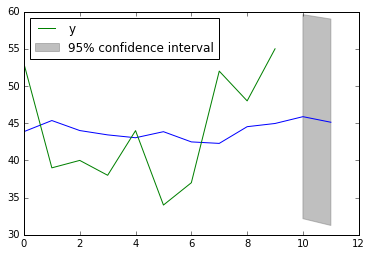

In [53]:
#Plot the CI
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-10, len(train)+1)
pyplot.legend(loc='upper left')
pyplot.show()

- The plot predict() function will plot the observed y values if the prediction interval covers
the training data. 
- In this case, we predict the previous 10 days and the next 1 day. 
- This is
useful to see the prediction carry on from in sample to out of sample time indexes. 
- This is
contracted with the actual observations from the last 10 days. 
- Finally, we can see the condence
interval as a gray cone around the predicted value. 
- This is useful to get a spatial feeling for the
range of possible values that an observation in the next time step may take.

# Save Models and Make Predictions
- Selecting a time series forecasting model is just the beginning. 
- Using the chosen model in
practice can pose challenges, 
- including data transformations and storing the model parameters
on disk.

In [41]:
# use daily-total-female birth
body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-total-female-births.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# fit an AR model and save the whole model to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
import numpy

# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
# load dataset
series = Series.from_csv(body, header=0)
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
numpy.save('ar_data.npy', X)
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])



#### This code will create file $$ar-model.pkl$$ that you can load later and use to make predictions.

- The entire differenced training dataset is saved as ar data.npy 
- and the last observation is saved
in the file ar obs.npy as an array with one item.

- The NumPy save() function is used to save the dierenced training data and the observation.
- The load() function3 can then be used to load these arrays later. 
- The snippet below will load
the model, dierenced data, and last observation.

In [42]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 0.12129822 -0.75275857 -0.612367   -0.51097172 -0.4176669  -0.32116469
 -0.23412997]
[50]


- You are subject to changes to the Statsmodels API. 
- Many data analyst preference is to work with the coecients of the model directly, as in
the case above, evaluating the model using a rolling forecast. 
- In this case, you could simply
store the model coecients and later load them and make predictions. 
- The example below saves
just the coecients from the model,

In [46]:
# fit an AR model and manually save coefficients to file
from pandas import Series
from statsmodels.tsa.ar_model import AR
import numpy

# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

X = difference(series.values)
# fit model
window_size = 6
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
# save coefficients
coef = model_fit.params
numpy.save('man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

# load the manually saved model from file
import numpy
coef = numpy.load('man_model.npy')
print(coef)
lag = numpy.load('man_data.npy')
print(lag)
last_ob = numpy.load('man_obs.npy')
print(last_ob)

[ 0.12129822 -0.75275857 -0.612367   -0.51097172 -0.4176669  -0.32116469
 -0.23412997]
[-10   3  15  -4   7  -5]
[50]


## Load and Predict
- Making a forecast involves loading the saved model and estimating the observation at the next
time step. 
- If the ARResults object was serialized, we can use the predict() function to predict
the next time period.

In [48]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 46.755211


## Update the Model
Our work is not done. Once the next real observation is made available, we must update the
data associated with the model. Specically, we must update:
1. The differenced training dataset used as inputs to make the subsequent prediction.
2. The last observation, providing a context for the predicted differenced value.

- Let's assume the next actual observation in the series was 48. 
- The new observation must
first be differenced with the last observation. 
- It can then be stored in the list of differenced
observations. 
- Finally, the value can be stored as the last observation.

In [50]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 48
# load the saved data
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ar_data.npy', data)
# update and save real observation
last_ob[0] = observation
numpy.save('ar_obs.npy', last_ob)

## Summary

- We have focused on one-step forecasts. These methods would work just as easily for multi-
step forecasts, by using the model repetitively and using forecasts of previous time steps as
input lag values to predict observations for subsequent time steps

- Generally, it is a good idea to keep track of all the observations. This will allow you to:
1. Provide a context for further time series analysis to understand new changes in the data.
2. Train a new model in the future on the most recent data.
3. Back-test new and dierent models to see if performance can be improved.

- For small applications, perhaps you could store the raw observations in a le alongside your
model. It may also be desirable to store the model coecients and required lag data and last
observation in plain text for easy review. For larger applications, perhaps a database system
could be used to store the observations.
